# SpaCy Tutorial
#### 01 Introduction to spaCy

## Install spaCy

In [1]:
# # Install spaCy
# !conda install spacy

In [2]:
import spacy

## Download pretrained model

SpaCy supports multiple languages, such as English, German, French, Spanish, Portuguese, Italian, Dutch, Greek, Japanese, etc.  

Here, we will use a medium-sized pretrained English model. A large model is slower but more accurate while a small model is faster but less accurate and has less features (e.g. no word vectors).

The model file contains weights, vocabulary, and model pipeline meta information.

In [3]:
# # Download
# !python -m spacy download en_core_web_md
# # Restart kernel after the model is downloaded

## Load model

In [4]:
# Create an nlp object
nlp = spacy.load("en_core_web_md")

In [5]:
# Example document
document = """Hey, I'm Yuibi. I work very hard at XYZ, Inc. as a data scientist. \
It's located in San Antonio, TX, which is the best city! 😊 \
You can buy 3 tacos for $2 as of December 13th, 2019. lol"""

In [6]:
# Created by processing a string of text with the nlp object
doc = nlp(document)

## Tokenization
Tokenization chops sentence(s) into pieces called tokens. For English, it normally uses whitespace as a separator with special treatments for punctuations, emoji. etc. SpaCy allows customization of most of its features (e.g. add infix "-" as a seperator for tokenization).  

![token](img/token.png)  

**Advanced:** Some languages do not use whitespaces to separate words. In those cases, do either
1. Segment text into morphemes before tokenization.  
2. Use byte-pair-encoding (BPE) to create sub-word units.  
BPE is also effective for English as shown in Google's BERT.

**Hiererarcy:** Corpus > document > sentence > word > sub-word > character > subcharacter > stroke  
Tokens are normally on word, sub-word, or character-level for English.

In [7]:
# For each token, print its token number and token text 
i = 0
for token in doc:
    i += 1
    print (f"{i} {token.text}")

1 Hey
2 ,
3 I
4 'm
5 Yuibi
6 .
7 I
8 work
9 very
10 hard
11 at
12 XYZ
13 ,
14 Inc.
15 as
16 a
17 data
18 scientist
19 .
20 It
21 's
22 located
23 in
24 San
25 Antonio
26 ,
27 TX
28 ,
29 which
30 is
31 the
32 best
33 city
34 !
35 😊
36 You
37 can
38 buy
39 3
40 tacos
41 for
42 $
43 2
44 as
45 of
46 December
47 13th
48 ,
49 2019
50 .
51 lol


## Stop Words
Stop words are common words, which are often not needed for downstream tasks like word frequency analysis, topic modeling, count vectorizer (to reduce features for, say, bag-of-word text classifier), etc.  

[Some AI researchers](https://twitter.com/deliprao/status/1068555626299584512) argue that stop word removal is detrimental for deep learning models as the removal can potentially change the meanings of documents (e.g. negation).

Stop word list can be customized.

In [8]:
# By default, spaCy contains a few hundred stop words for English 
spacy_stop_words = spacy.lang.en.stop_words.STOP_WORDS
len(spacy_stop_words)

326

In [11]:
# Print 30 stop words
list(spacy_stop_words)[:30]

['front',
 'a',
 'thru',
 'someone',
 'twelve',
 "'ve",
 'also',
 'therefore',
 'however',
 'doing',
 'onto',
 'us',
 'seeming',
 'down',
 'more',
 'two',
 'full',
 'whose',
 'sixty',
 'anyhow',
 'eleven',
 'might',
 'somehow',
 'hence',
 'too',
 'becoming',
 'few',
 'noone',
 'ca',
 'one']

## Lemmatization  
Lemmatization converts a word into its inflected form (lemma) while still ensuring that the reduced form (lemma) belongs to the language, which might not be the case for Stemming. See the table below for an example.  

Lemmatization depends on part-of-speech (**POS**) tagging, and is rule-based (for now).  

As with stop words, lemmatization can help downstream tasks by normalizing text, but for deep learning tasks, it is almost always skipped.  

Stemming is not available in spaCy.  

Word | Stem | Lemma
--- | --- | ---
Studies | Studi | Study
Studying | Study | Study

In [12]:
# For each token, print its token number, token text, and lemma 
i = 0
for token in doc:
    i += 1
    print (f"{i} {token.text} \t\t {token.lemma_}")

1 Hey 		 hey
2 , 		 ,
3 I 		 -PRON-
4 'm 		 be
5 Yuibi 		 Yuibi
6 . 		 .
7 I 		 -PRON-
8 work 		 work
9 very 		 very
10 hard 		 hard
11 at 		 at
12 XYZ 		 XYZ
13 , 		 ,
14 Inc. 		 Inc.
15 as 		 as
16 a 		 a
17 data 		 data
18 scientist 		 scientist
19 . 		 .
20 It 		 -PRON-
21 's 		 be
22 located 		 locate
23 in 		 in
24 San 		 San
25 Antonio 		 Antonio
26 , 		 ,
27 TX 		 TX
28 , 		 ,
29 which 		 which
30 is 		 be
31 the 		 the
32 best 		 good
33 city 		 city
34 ! 		 !
35 😊 		 😊
36 You 		 -PRON-
37 can 		 can
38 buy 		 buy
39 3 		 3
40 tacos 		 taco
41 for 		 for
42 $ 		 $
43 2 		 2
44 as 		 as
45 of 		 of
46 December 		 December
47 13th 		 13th
48 , 		 ,
49 2019 		 2019
50 . 		 .
51 lol 		 lol


## Sentence Segmentation  
SpaCy can split a document into individual sentences by predicting sentence boundaries. As with most features in spaCy, this can be customized.

In [13]:
# for each sentence, print sentence number and text
i = 0
for sentence in doc.sents:
    i += 1
    print (f"{i} {sentence}")

1 Hey, I'm Yuibi.
2 I work very hard at XYZ, Inc. as a data scientist.
3 It's located in San Antonio, TX, which is the best city!
4 😊
5 You can buy 3 tacos for $2 as of December 13th, 2019.
6 lol


## Statistical Models  
SpaCy comes with 3 deep neural network (DNN) based models:
1. Part-of-speech (**POS**) tagger
2. Named entity recognizer (**NER**)
3. Syntactic dependency parser

SpaCy used supervised Seq2Seq convolutional neural network (CNN) with sub-word embedding, residual connections, and layer normalization in a multi-task fashion to train those models. These models can be retrained if you have your own labeled data.

### Part-of-speech (**POS**)  
POS indicates which category a word is assigned to in accordance with its syntactic functions.  

Examples:
- Noun
- Pronoun
- Proper noun
- Adjective
- Verb
- Adverb
- Adposition
- Auxiliary
- Punctuation
- Determiner 
- Subordinating conjunction
- Interjection

In [14]:
# For each token, print its token number, token text, and POS 
i = 0
for token in doc:
    i += 1
    print (f"{i} {token.text} \t\t {token.pos_}")

1 Hey 		 INTJ
2 , 		 PUNCT
3 I 		 PRON
4 'm 		 AUX
5 Yuibi 		 PROPN
6 . 		 PUNCT
7 I 		 PRON
8 work 		 VERB
9 very 		 ADV
10 hard 		 ADV
11 at 		 ADP
12 XYZ 		 PROPN
13 , 		 PUNCT
14 Inc. 		 PROPN
15 as 		 SCONJ
16 a 		 DET
17 data 		 NOUN
18 scientist 		 NOUN
19 . 		 PUNCT
20 It 		 PRON
21 's 		 AUX
22 located 		 VERB
23 in 		 ADP
24 San 		 PROPN
25 Antonio 		 PROPN
26 , 		 PUNCT
27 TX 		 PROPN
28 , 		 PUNCT
29 which 		 DET
30 is 		 AUX
31 the 		 DET
32 best 		 ADJ
33 city 		 NOUN
34 ! 		 PUNCT
35 😊 		 X
36 You 		 PRON
37 can 		 VERB
38 buy 		 VERB
39 3 		 NUM
40 tacos 		 NOUN
41 for 		 ADP
42 $ 		 SYM
43 2 		 NUM
44 as 		 SCONJ
45 of 		 ADP
46 December 		 PROPN
47 13th 		 NOUN
48 , 		 PUNCT
49 2019 		 NUM
50 . 		 PUNCT
51 lol 		 INTJ


### Named Entity Recognizer (**NER**)  
NER locates named entities and classifies them into pre-defined categories, such as:  
- PERSON	People, including fictional.
- FAC	Buildings, airports, highways, bridges, etc.
- ORG	Companies, agencies, institutions, etc.
- GPE	Countries, cities, states.
- PRODUCT	Objects, vehicles, foods, etc. (Not services.)
- EVENT	Named hurricanes, battles, wars, sports events, etc.
- DATE	Absolute or relative dates or periods.
- TIME	Times smaller than a day.
- MONEY	Monetary values, including unit.
- QUANTITY	Measurements, as of weight or distance.
- ORDINAL	“first”, “second”, etc.
- CARDINAL	Numerals that do not fall under another type.  

In [15]:
# For each extracted token, print its token number, token text, and named entities 
i = 0
for token in doc.ents:
    i += 1
    print (f"{i} {token.text} \t\t {token.label_}")

1 Yuibi 		 PERSON
2 XYZ, Inc. 		 ORG
3 San Antonio 		 GPE
4 TX 		 GPE
5 3 		 CARDINAL
6 2 		 MONEY
7 December 13th 		 DATE
8 2019 		 DATE


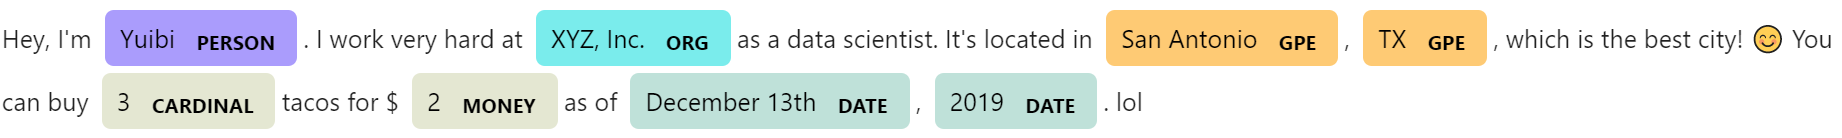

In [16]:
# Visualize NER
spacy.displacy.render(doc, style='ent')

### Syntactic Dependency Parser  
This process extracts the dependency parse of a sentence to represent its grammatical structure. The extracted structured is represented as directed graph, and it can be used as features in some deep learning algorithms (Tree-Recursive Neural Network, Graph Neural Network, etc).

In [17]:
# For each token, print its token number, token text, and dependency 
i = 0
for token in doc:
    i += 1
    print (f"{i} {token.text} \t\t {token.dep_} \t\t {token.head.text}")

1 Hey 		 intj 		 'm
2 , 		 punct 		 'm
3 I 		 nsubj 		 'm
4 'm 		 ROOT 		 'm
5 Yuibi 		 attr 		 'm
6 . 		 punct 		 'm
7 I 		 nsubj 		 work
8 work 		 ROOT 		 work
9 very 		 advmod 		 hard
10 hard 		 advmod 		 work
11 at 		 prep 		 work
12 XYZ 		 pobj 		 at
13 , 		 punct 		 Inc.
14 Inc. 		 appos 		 XYZ
15 as 		 prep 		 work
16 a 		 det 		 scientist
17 data 		 compound 		 scientist
18 scientist 		 pobj 		 as
19 . 		 punct 		 work
20 It 		 nsubjpass 		 located
21 's 		 auxpass 		 located
22 located 		 ROOT 		 located
23 in 		 prep 		 located
24 San 		 compound 		 Antonio
25 Antonio 		 pobj 		 in
26 , 		 punct 		 Antonio
27 TX 		 appos 		 Antonio
28 , 		 punct 		 Antonio
29 which 		 nsubj 		 is
30 is 		 relcl 		 Antonio
31 the 		 det 		 city
32 best 		 amod 		 city
33 city 		 attr 		 is
34 ! 		 punct 		 located
35 😊 		 ROOT 		 😊
36 You 		 nsubj 		 buy
37 can 		 aux 		 buy
38 buy 		 ROOT 		 buy
39 3 		 nummod 		 tacos
40 tacos 		 dobj 		 buy
41 for 		 prep 		 buy
42 $ 		 nmod 		 2
43 2 		 po

In [18]:
# Visualize syntactic dependency
# Split into sentences
sentence_spans = list(doc.sents)
spacy.displacy.render(sentence_spans, style="dep")